**TP INDIVIDUAL**

Machine Learning

Juan Pablo Nieto Uribe

juanpablonietou@gmail.com

Una plataforma de ventas online nos contrata para que realicemos un modelo que nos permita detectar un posible fraude dada cierta operación. Para ello contamos con un dataset que contiene las siguientes columnas:



*   **Step:** Reptresenta una unidad de tiempo donde 1 step equivale a 1 hora.
*   **Type:** Tipo de transacción en línea.
*   **Amount:** El importe de la transacción.
*   **oldbalanceOrg:** Saldo antes de la transacción.
*   **newbalanceOrig:** Saldo después de la transacción.
*   **nameDest:** Destinatario de la transacción
*   **oldbalanceDest:** Saldo inicial del destinatario antes de la transacción.
*   **newbalanceDest:** El nuevo saldo del destinatario después de la transacción.
*   **isFraud:** Transacción fraudulenta.

Utilizando los modelos de clasificación vistos hasta el momento, generar un notebook que permita, de ser posible, resolver el problema que nos está planteando el cliente.













El dataset se encuentra en: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset


Antes de iniciar con la ejecución de código, categorizamos el problema a fin de saber cuál será la mejor forma de abordarlo. Dicho esto, tenemos que:



*   **Input:** Datos labeled: Modelo supervisado.
*   **Output:** Clasificación de los datos entre fraudulentos y legítimos.



In [ ]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc

In [ ]:
ruta_dataset='/content/drive/MyDrive/UBA/Cursos/3. Tercer Bimestre/2. ML/PS_20174392719_1491204439457_log.csv'
df=pd.read_csv(ruta_dataset)
df.head

<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
0           1   PAYMENT     9839.64  C1231006815      170136.00   
1           1   PAYMENT     1864.28  C1666544295       21249.00   
2           1  TRANSFER      181.00  C1305486145         181.00   
3           1  CASH_OUT      181.00   C840083671         181.00   
4           1   PAYMENT    11668.14  C2048537720       41554.00   
...       ...       ...         ...          ...            ...   
6362615   743  CASH_OUT   339682.13   C786484425      339682.13   
6362616   743  TRANSFER  6311409.28  C1529008245     6311409.28   
6362617   743  CASH_OUT  6311409.28  C1162922333     6311409.28   
6362618   743  TRANSFER   850002.52  C1685995037      850002.52   
6362619   743  CASH_OUT   850002.52  C1280323807      850002.52   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
0             160296.36  M1979787155            0.00            0.00        0   
1  

Antes de comenzar a procesar el dataset, observamos el comportamiento de las variables según vienen en el dataset. En particular, pondremos especial atención en las cuentas de la columna isFraud, que es nuestra variable objetivo, teniendo en cuenta que buscamos que este código nos permita detectar posibles transacciones fraudulentas. 

In [ ]:
#sns.pairplot(df)

Observemos si las clases se encuentran balanceadas

In [ ]:
val_co=df['isFraud'].value_counts(dropna=False)
long_dataset=len(df)
porcentaje_legitimas=100*val_co[0]/long_dataset
porcentaje_fraudulentas=100*val_co[1]/long_dataset
print('las transacciones legítimas son el',porcentaje_legitimas,' y las fraudulentas representan el',porcentaje_fraudulentas)

las transacciones legítimas son el 99.87091795518198  y las fraudulentas representan el 0.12908204481801522


In [ ]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
print('Antes de borrar los Nans, la longitud de df es: ',len(df))
elDropna=df.dropna(axis=0)
print('Después de borrar los Nans, la longitud de df es: ', len(elDropna))

Antes de borrar los Nans, la longitud de df es:  6362620
Después de borrar los Nans, la longitud de df es:  6362620


Observamos que una vez realizado el proceso de drop los NA, el dataset mantiene su longitud, por este motivo, podríamos decir que en el dataset no habría ningún dato vacío. Para corroborar, ejecutamos que:

In [ ]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

Ahora observamos cuáles son los tipos de cada uno de los datos.

In [ ]:
df.shape
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Antes de continuar, miramos cómo se comportan las variables filtradas para que todas sean fraudulentas.

In [ ]:
df2=df.loc[df['isFraud']==1]
df2.shape

(8213, 11)

In [ ]:
df2.nunique()

step               741
type                 2
amount            3977
nameOrig          8213
oldbalanceOrg     4094
newbalanceOrig     145
nameDest          8169
oldbalanceDest    2863
newbalanceDest    4067
isFraud              1
isFlaggedFraud       2
dtype: int64

Para este punto, y a pesar que vemos que hay más de una variable categórica, solo sacaremos dummies de la variable Type, teniendo en cuenta que las otras variables categóricas del dataset corresponden a un identificador del origen y del destino de la transacción.

Dicho esto, si sacáramos dummies de estas variables, podríamos terminar con ruido en el modelo.

In [ ]:
excluir_columnas = ['step','amount','nameOrig','oldbalanceOrg','newbalanceOrig','nameDest','oldbalanceDest','newbalanceDest','isFraud','isFlaggedFraud'] 
columnas_dummy = list(set(df.columns) - set(excluir_columnas))
df = pd.get_dummies(df, columns=columnas_dummy)

Y reviso qué obtengo:

In [ ]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


Finalmente, manipulo mis variables categóricas de forma que pueda manipularlas. 

In [ ]:
'''labelsCategoricas=LabelEncoder()
dfNombreOrigen=df['nameOrig']
dfNombreDestino=df['nameDest']
#labelsCategoricas.fit(dfNombreOrigen)
df['nameOrig']=labelsCategoricas.fit_transform(dfNombreOrigen)
df['nameDest']=labelsCategoricas.fit_transform(dfNombreDestino)'''

del df['nameOrig']
del df['nameDest']

In [ ]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


Separamos la variable dependiente del dataset y hacemos la separación de los datasets de train,test y valid.

In [ ]:
y=df['isFraud']
x=df.drop(['isFraud'],axis=1)

In [ ]:
porcentaje_train=60/100
porcentaje_test=20/100
porcentaje_valid=1-(porcentaje_train+porcentaje_test)
cienP=porcentaje_test+porcentaje_valid
porcentaje_test_b=porcentaje_test/cienP

print('porcentaje train es',porcentaje_train)
print('porcentaje test es',porcentaje_test)
print('porcentaje_valid es ',porcentaje_valid)
print(porcentaje_test_b,'la b da')

#train,test,valid=np.split(df.sample(frac=1),[int(porcentaje_train*long_dataset)],int(porcentaje_test*long_dataset))

X_train,X_splitter,Y_train,Y_splitter=train_test_split(x,y,train_size = porcentaje_train,random_state=1)
X_test,X_valid,Y_test,Y_valid=train_test_split(X_splitter,Y_splitter,train_size=porcentaje_test_b,random_state=1)

porcentaje train es 0.6
porcentaje test es 0.2
porcentaje_valid es  0.19999999999999996
0.5000000000000001 la b da


Después de haber dividido los datasets, chequeo que en el de validación hayan quedado algunas transacciones fraudulentas.

In [ ]:
cuantos_fraudes=Y_valid.sum()
print('En el dataset de validación quedaron',cuantos_fraudes,'transacciones fraudulentas.')

En el dataset de validación quedaron 1607 transacciones fraudulentas.


Podemos ver que el dataset a pesar de que no tiene ningún dato vacío, está muy desbalanceado. Siendo así, entramos a corregir.

Para esto, vamos a utilizar la estrategia de oversampling de los casos de transacciones fraudulentas.

In [ ]:
ovs=RandomOverSampler(sampling_strategy='minority');
X_train_ovs,Y_train_ovs=ovs.fit_resample(X_train,Y_train);
print(x.size)
print(y.size)

76351440
6362620


In [ ]:
print('Antes del undersampler, el tamaño me queda:')
print(X_train.size)
print(Y_train.size)

uds=RandomUnderSampler(sampling_strategy='majority');
X_train_uds,Y_train_uds=uds.fit_resample(X_train,Y_train);

print('Después del undersampler, el tamaño me queda:')
print(X_train_uds.size)
print(Y_train_uds.size)

Antes del undersampler, el tamaño me queda:
45810864
3817572
Después del undersampler, el tamaño me queda:
118392
9866


In [ ]:
#print(Y_train_ovs.value_counts())

In [ ]:
val_co=df['isFraud'].value_counts(dropna=False)
long_dataset=len(df)
porcentaje_legitimas=100*val_co[0]/long_dataset
porcentaje_fraudulentas=100*val_co[1]/long_dataset
print('Después de hacer undersampling, las transacciones legítimas son el',porcentaje_legitimas,' y las fraudulentas representan el',porcentaje_fraudulentas)

Después de hacer undersampling, las transacciones legítimas son el 99.87091795518198  y las fraudulentas representan el 0.12908204481801522


Ya una vez se ha hecho una exploración inicial de los datos, pasamos rápidamente a determinar cuál es el modelo que mejor se ajusta a nuestros datos.

Intentamos primero con una Regresión Logística:

In [ ]:
#Usamos Cross Validation
modelo=LogisticRegressionCV(max_iter=3000)

In [ ]:
def log_reg (x_entrenamiento,x_test,y_entrenamiento,y_test,elModelo):
  scaler=StandardScaler()
  
  x_entrenamiento_log=scaler.fit_transform(x_entrenamiento)
  x_test_log=scaler.transform(x_test)

  elModelo.fit(x_entrenamiento_log,y_entrenamiento)

  #Calculamos la probabilidad de las clases
  y_predicho=modelo.predict(x_test_log)
  t_probable=modelo.predict_proba(x_test_log)

  print(classification_report(y_test,y_predicho))

  print('Area bajo la curva ROC:',np.round(roc_auc_score(y_test,t_probable[:,1]),4))
    
  precision, recall,threshold=precision_recall_curve(y_test,t_probable[:,1]);

  print('Area bajo la curva Precision-Recall:',np.round(auc(recall,precision),4))

  #plot_confusion_matrix(modelo,x_test_log,y_test,cmap='Blues');
  plot_confusion_matrix(modelo,x_test_log,y_test);
  return elModelo


              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270851
           1       0.03      0.98      0.05      1673

    accuracy                           0.95   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.95      0.98   1272524

Area bajo la curva ROC: 0.9934
Area bajo la curva Precision-Recall: 0.6521


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


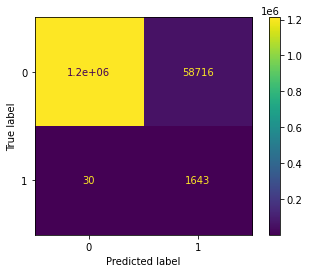

In [ ]:
lrU=log_reg(X_train_uds,X_test,Y_train_uds,Y_test,modelo)

In [ ]:
score_modelo=lrU.score(X_test,Y_test)
print(score_modelo)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


0.6435454262552219


              precision    recall  f1-score   support

           0       1.00      0.95      0.98   1270851
           1       0.03      0.98      0.05      1673

    accuracy                           0.95   1272524
   macro avg       0.51      0.97      0.51   1272524
weighted avg       1.00      0.95      0.97   1272524

Area bajo la curva ROC: 0.9935
Area bajo la curva Precision-Recall: 0.6463


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


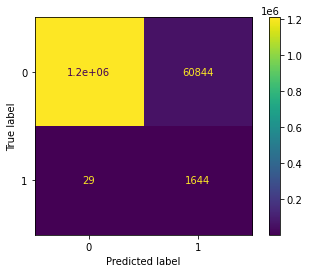

In [ ]:
lrO=log_reg(X_train_ovs,X_test,Y_train_ovs,Y_test,modelo)

Finalmente, se prueban los resultados del modelo de dos formas: tomando algunos datos aleatorios del dataset de validación, así como insertando algunos datos manualmente y observando el resultado.

In [ ]:
laFila=X_valid.iloc[2][1]
print(laFila)
print(laFila.shape)

11967.48
()


In [ ]:
def loEs(estado):
  if estado==1:
    return '¡¡¡ES FRAUDE!!!'
  else:
    return 'no es fraude'

Finalmente, metemos a mano la información de una de las transacciones que sabemos que es fraude, y observamos el reaultado que nos arroja el modelo.

In [ ]:
features = np.array([[743, 850002.52, 850002.52, 0.0,6510099.11,7360101.63,0,0,1,0,0,0]])
print(loEs(lrU.predict(features)))
print(loEs(lrO.predict(features)))

¡¡¡ES FRAUDE!!!
¡¡¡ES FRAUDE!!!
